In [2]:
import os

In [3]:
os.chdir('tabsyn/')

In [ ]:
%pip install torch torchvision torchaudio

In [ ]:
# install requirements for TabSyn
!wget https://raw.githubusercontent.com/amazon-science/tabsyn/main/requirements.txt
%pip install -r requirements.txt

In [ ]:
# download transactions
!wget https://storage.yandexcloud.net/ds-ods/files/data/docs/competitions/DataFusion2024/Data/transactions.csv.zip
!unzip transactions.csv.zip
!rm transactions.csv.zip

In [1]:
!head transactions.csv

"user_id","mcc_code","currency_rk","transaction_amt","transaction_dttm"
3,3,1,-183.88395690918,2022-01-28 12:05:33
3,3,1,-3206.43701171875,2022-01-28 12:52:30
3,16,1,-153866.890625,2022-02-16 14:45:56
3,56,1,-15144.6015625,2022-03-09 19:58:29
3,0,1,5297.90869140625,2022-03-12 18:11:31
3,0,1,534.363098144531,2022-04-11 20:48:26
3,0,1,4549.455078125,2022-04-11 20:53:35
3,0,1,37991.9296875,2022-04-29 18:42:58
3,0,1,28335.61328125,2022-05-05 20:32:38


In [7]:
import pandas as pd
import json
from datetime import datetime
TIME_FORMAT='%Y-%m-%d %H:%M:%S'

In [12]:
#transactions = pd.read_csv('transactions.csv', sep=',', index_col=False, usecols=lambda x: x != "user_id")
transactions = pd.read_csv('transactions.csv', sep=',', index_col=False)
transactions.head()

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm
0,3,3,1,-183.883957,2022-01-28 12:05:33
1,3,3,1,-3206.437012,2022-01-28 12:52:30
2,3,16,1,-153866.890625,2022-02-16 14:45:56
3,3,56,1,-15144.601562,2022-03-09 19:58:29
4,3,0,1,5297.908691,2022-03-12 18:11:31


In [ ]:
# '2022-01-28 12:05:33' -> 1643371533
'''
def convert_date_to_timestamp(x):
  return datetime.strptime(x, TIME_FORMAT).timestamp()#strftime("%s"))

transactions['transaction_dttm'] = transactions['transaction_dttm'].apply(convert_date_to_timestamp)
transactions['transaction_dttm_dif'] = transactions['transaction_dttm'].diff()
transactions.at[0, 'transaction_dttm_dif'] = 0
transactions.head()
'''

<Axes: >

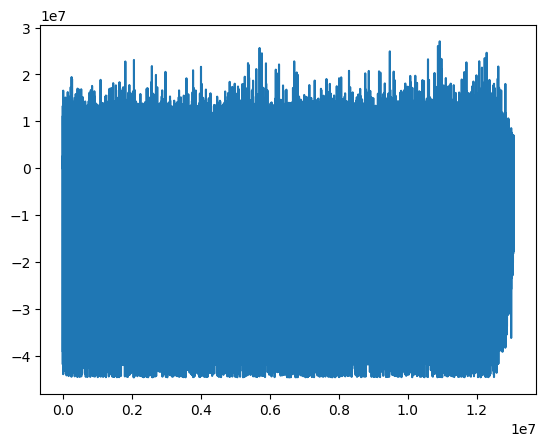

In [ ]:
transactions['transaction_dttm_dif'].plot()

In [ ]:
transactions['transaction_dttm_dif'].min(),transactions['transaction_dttm_dif'].max()

In [13]:
transactions['min_datetime'] = transactions.groupby('user_id')['transaction_dttm'].transform('min')

In [14]:
def convert_date_to_timestamp(x):
  return datetime.strptime(x, TIME_FORMAT).timestamp()#strftime("%s"))

transactions['min_datetime'] = transactions['min_datetime'].apply(convert_date_to_timestamp)

In [15]:
transactions['transaction_dttm'] = transactions['transaction_dttm'].apply(convert_date_to_timestamp)

In [16]:
transactions['time_diff'] = transactions['transaction_dttm'] - transactions['min_datetime']

In [17]:
transactions_DT = transactions.drop(columns=['transaction_dttm', 'min_datetime'])

In [18]:
transactions_DT.to_csv('transactions_dt.csv', index = False)

In [ ]:
!cp transactions_dt.csv drive/MyDrive/TimeGradProject/

<Axes: >

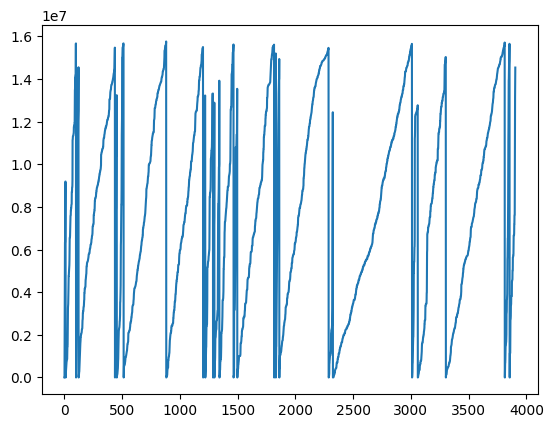

In [ ]:
transactions[transactions.user_id <= 100]['time_diff'].plot()

In [43]:
transactions_DT.isnull().values.any()

False

In [20]:
!head transactions_dt.csv

user_id,mcc_code,currency_rk,transaction_amt,time_diff
3,3,1,-183.88395690918,0.0
3,3,1,-3206.43701171875,2817.0
3,16,1,-153866.890625,1651223.0
3,56,1,-15144.6015625,3484376.0
3,0,1,5297.90869140625,3737158.0
3,0,1,534.363098144531,6338573.0
3,0,1,4549.455078125,6338882.0
3,0,1,37991.9296875,7886245.0
3,0,1,28335.61328125,8411225.0


In [29]:
config_file = {
    "name": "transactions_dt",
    "task_type": "binclass", # binclass or regression
    "header": "infer",
    "column_names": [],
    "num_col_idx": [3, 4],  # list of indices of numerical columns
    "cat_col_idx": [0, 1, 2],  # list of indices of categorical columns
    "target_col_idx": [], # list of indices of the target columns (for MLE)
    "file_type": "csv",
    "data_path": "data/transactions_dt/transactions_dt.csv",
    "test_path": ''
}

In [1]:
import json

In [30]:
with open('transactions_dt.json', 'w') as js:
    json.dump(config_file, js)

In [25]:
!mkdir tabsyn/data/transactions_dt
!mv transactions_dt.csv tabsyn/data/transactions_dt/transactions_dt.csv
!mv transactions_dt.json tabsyn/data/Info/transactions_dt.json


In [31]:
!cp transactions_dt.json data/Info/

In [ ]:
run process_dataset.py --dataname transactions_dt

In [5]:
!cp tabsyn/main.py tabsyn/vae

In [4]:
torch.cuda.empty_cache()

In [25]:
run main.py --dataname transactions_dt_split_nouser --method vae --mode train

govno
zalupa
No NaNs in numerical features, skipping
tensor([[  0.0802,  -1.6559],
        [ -0.1998,  -1.6552],
        [-14.1571,  -1.2498],
        [ -1.3057,  -0.7991],
        [  0.5881,  -0.7369],
        [  0.1468,  -0.0972],
        [  0.5187,  -0.0971],
        [  3.6169,   0.2834],
        [  2.7223,   0.4124],
        [  0.5963,   0.6034]])
tensor([[ 3,  1],
        [ 3,  1],
        [15,  1],
        [55,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1],
        [ 0,  1]])
tensor([[ 0.0942,  1.7650],
        [ 0.0937,  1.7790],
        [ 0.0937,  1.7871],
        [ 0.0937,  1.7877],
        [ 0.0942,  1.8077],
        [-0.0073,  1.8142],
        [ 0.0937,  1.8618],
        [ 0.0870,  1.8721],
        [ 0.0512,  1.8737],
        [ 0.0883,  1.8742]])
tensor([[10,  1],
        [10,  1],
        [10,  1],
        [10,  1],
        [10,  1],
        [ 4,  1],
        [10,  1],
        [ 1,  1],
        [ 1,  1],
        [ 1,  1]])
tor

Val step 1/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 0, beta = 0.010000, Train MSE: 1.213095, Train CE:3.107360, Train KL:0.521649, Val MSE:0.788101, Val CE:2.943848, Train ACC:0.473984, Val ACC:0.509400


Val step 2/30: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


121063
epoch: 1, beta = 0.010000, Train MSE: 0.436341, Train CE:2.623312, Train KL:1.025451, Val MSE:0.305884, Val CE:2.261895, Train ACC:0.555256, Val ACC:0.628082


Val step 3/30: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


121063
epoch: 2, beta = 0.010000, Train MSE: 0.219073, Train CE:1.911833, Train KL:2.450381, Val MSE:0.147477, Val CE:1.607530, Train ACC:0.640621, Val ACC:0.657955


Val step 4/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 3, beta = 0.010000, Train MSE: 0.117053, Train CE:1.609548, Train KL:3.683942, Val MSE:0.090261, Val CE:1.482530, Train ACC:0.642749, Val ACC:0.657781


Val step 5/30: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


121063
epoch: 4, beta = 0.010000, Train MSE: 0.073202, Train CE:1.532174, Train KL:3.692829, Val MSE:0.070396, Val CE:1.422524, Train ACC:0.642743, Val ACC:0.657967


Val step 6/30: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


121063
epoch: 5, beta = 0.010000, Train MSE: 0.053486, Train CE:1.469293, Train KL:3.620079, Val MSE:0.057138, Val CE:1.357843, Train ACC:0.642997, Val ACC:0.658546


Val step 7/30: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


121063
epoch: 6, beta = 0.010000, Train MSE: 0.044023, Train CE:1.397250, Train KL:3.592006, Val MSE:0.044649, Val CE:1.283644, Train ACC:0.644684, Val ACC:0.660243


Val step 8/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 7, beta = 0.010000, Train MSE: 0.037558, Train CE:1.302429, Train KL:3.587591, Val MSE:0.031488, Val CE:1.182987, Train ACC:0.650108, Val ACC:0.661147


Val step 9/30: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


121063
epoch: 8, beta = 0.010000, Train MSE: 0.030831, Train CE:1.187323, Train KL:3.932356, Val MSE:0.021292, Val CE:1.058744, Train ACC:0.666135, Val ACC:0.677391


Val step 10/30: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


121063
epoch: 9, beta = 0.010000, Train MSE: 0.027700, Train CE:1.048328, Train KL:4.631542, Val MSE:0.051856, Val CE:0.910621, Train ACC:0.690203, Val ACC:0.788878


Val step 11/30: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


121063
epoch: 10, beta = 0.010000, Train MSE: 0.028199, Train CE:0.902771, Train KL:5.442205, Val MSE:0.084348, Val CE:0.778259, Train ACC:0.774504, Val ACC:0.838113


Val step 12/30: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


121063
epoch: 11, beta = 0.010000, Train MSE: 0.026787, Train CE:0.778024, Train KL:6.038769, Val MSE:0.068220, Val CE:0.663102, Train ACC:0.817830, Val ACC:0.856529


Val step 13/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 12, beta = 0.010000, Train MSE: 0.024415, Train CE:0.665129, Train KL:6.381359, Val MSE:0.048315, Val CE:0.559597, Train ACC:0.845666, Val ACC:0.879203


Val step 14/30: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


121063
epoch: 13, beta = 0.010000, Train MSE: 0.021374, Train CE:0.574394, Train KL:6.660572, Val MSE:0.036369, Val CE:0.484938, Train ACC:0.860806, Val ACC:0.885774


Val step 15/30: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


121063
epoch: 14, beta = 0.010000, Train MSE: 0.019188, Train CE:0.506198, Train KL:6.830745, Val MSE:0.031192, Val CE:0.426733, Train ACC:0.870970, Val ACC:0.894538


Val step 16/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 15, beta = 0.010000, Train MSE: 0.017909, Train CE:0.450722, Train KL:6.838560, Val MSE:0.023303, Val CE:0.379044, Train ACC:0.882577, Val ACC:0.901171


Val step 17/30: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


121063
epoch: 16, beta = 0.010000, Train MSE: 0.016859, Train CE:0.403243, Train KL:6.730916, Val MSE:0.018696, Val CE:0.337418, Train ACC:0.900047, Val ACC:0.930887


Val step 18/30: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

121063


epoch: 17, beta = 0.010000, Train MSE: 0.015694, Train CE:0.359396, Train KL:6.585438, Val MSE:0.015720, Val CE:0.297295, Train ACC:0.929538, Val ACC:0.947920


Val step 19/30: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


121063
epoch: 18, beta = 0.010000, Train MSE: 0.015129, Train CE:0.317489, Train KL:6.458814, Val MSE:0.016786, Val CE:0.262330, Train ACC:0.937055, Val ACC:0.950600


Val step 20/30: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


121063
epoch: 19, beta = 0.010000, Train MSE: 0.014437, Train CE:0.279560, Train KL:6.272761, Val MSE:0.018649, Val CE:0.232140, Train ACC:0.944055, Val ACC:0.957435


Val step 21/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 20, beta = 0.010000, Train MSE: 0.013708, Train CE:0.246775, Train KL:6.016004, Val MSE:0.018088, Val CE:0.204600, Train ACC:0.950564, Val ACC:0.961421


Val step 22/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 21, beta = 0.010000, Train MSE: 0.012751, Train CE:0.219386, Train KL:5.711262, Val MSE:0.018238, Val CE:0.180129, Train ACC:0.956063, Val ACC:0.966133


Val step 23/30: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


121063
epoch: 22, beta = 0.010000, Train MSE: 0.011813, Train CE:0.196066, Train KL:5.396950, Val MSE:0.020570, Val CE:0.160490, Train ACC:0.958380, Val ACC:0.967711


Val step 24/30: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


121063
epoch: 23, beta = 0.010000, Train MSE: 0.010661, Train CE:0.175457, Train KL:5.136038, Val MSE:0.021680, Val CE:0.141829, Train ACC:0.961628, Val ACC:0.970491


Val step 25/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 24, beta = 0.010000, Train MSE: 0.009927, Train CE:0.157301, Train KL:4.920730, Val MSE:0.019132, Val CE:0.126847, Train ACC:0.966906, Val ACC:0.974505


Val step 26/30: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


121063
epoch: 25, beta = 0.010000, Train MSE: 0.009275, Train CE:0.141634, Train KL:4.741856, Val MSE:0.017408, Val CE:0.114359, Train ACC:0.972397, Val ACC:0.976392


Val step 27/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 26, beta = 0.010000, Train MSE: 0.008746, Train CE:0.128145, Train KL:4.591970, Val MSE:0.013134, Val CE:0.103559, Train ACC:0.974790, Val ACC:0.977359


Val step 28/30: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


121063
epoch: 27, beta = 0.010000, Train MSE: 0.008176, Train CE:0.116909, Train KL:4.444686, Val MSE:0.010769, Val CE:0.093905, Train ACC:0.976570, Val ACC:0.979544


Val step 29/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 28, beta = 0.010000, Train MSE: 0.007759, Train CE:0.106979, Train KL:4.304908, Val MSE:0.009111, Val CE:0.085810, Train ACC:0.978377, Val ACC:0.982270


Val step 30/30: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


121063
epoch: 29, beta = 0.010000, Train MSE: 0.007448, Train CE:0.097979, Train KL:4.172408, Val MSE:0.007964, Val CE:0.077896, Train ACC:0.979858, Val ACC:0.985223
Training time: 25.4598 mins
self.category_embeddings.weight.shape=torch.Size([336, 4])
Successfully load and save the model!


Compute step 30/30: 100%|██████████| 212/212 [01:32<00:00,  2.29it/s]


[[-1.0004704   0.97139478 -1.32906342 -0.82115746]
 [ 0.43459344  3.31373549  0.4660666   0.30495107]
 [-2.56757259 -0.18033981  0.18707156 -1.45877361]
 [ 6.82089996  1.99876535 -5.31195545  2.39254904]
 [-0.68915379  1.25536609  0.10446465  0.40805453]]
Successfully save pretrained embeddings (train) in disk!


Compute step 30/30: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


Successfully save pretrained embeddings (val) in disk!


In [24]:
%load_ext autoreload
%autoreload 2

kakashka
LR: 0.0001
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
!mv tabsyn/vae/ckpt/transactions_dt/ tabsyn/vae/ckpt/transactions_dt_lr_6e3

In [8]:
import pandas as pd
import numpy as np

In [4]:
X_cat_test = np.load('data/transactions_dt/X_cat_test.npy', allow_pickle=True)
X_cat_train = np.load('data/transactions_dt/X_cat_train.npy', allow_pickle=True)

X_num_test = np.load('data/transactions_dt/X_num_test.npy', allow_pickle=True)
X_num_train = np.load('data/transactions_dt/X_num_train.npy', allow_pickle=True)

In [5]:
X_cat_test.shape

(1307503, 3)

In [8]:
X_cat_train[:10]

array([[298598, 78, 1],
       [448693, 3, 1],
       [19569, 1, 1],
       [161870, 2, 1],
       [460773, 15, 1],
       [329450, 2, 1],
       [490588, 4, 1],
       [389967, 2, 1],
       [472186, 15, 1],
       [55459, 9, 1]], dtype=object)

In [21]:
!pwd

/home/jupyter/work/resources/tabsyn


In [25]:
!head data/transactions_dt_/test.csv

user_id,mcc_code,currency_rk,transaction_amt,time_diff
235843,1,1,-794.06525,1640301.0
85557,1,1,-344.99463,6588094.0
50343,11,1,-25.221405,12403.0
485319,11,1,-32.676617,2482032.0
441976,13,1,-340.5111,7332872.0
373446,1,1,-226.35385,12359776.0
498771,0,1,62017.395,6038697.0
40237,1,1,-681.3548,10552067.0
308622,4,1,-158.10422,7091375.0


In [7]:
X_cat_test_split = np.load('data/transactions_dt_split/X_cat_test.npy', allow_pickle=True)
X_cat_train_split = np.load('data/transactions_dt_split/X_cat_train.npy', allow_pickle=True)

X_num_test_split = np.load('data/transactions_dt_split/X_num_test.npy', allow_pickle=True)
X_num_train_split = np.load('data/transactions_dt_split/X_num_train.npy', allow_pickle=True)

In [12]:
X_num_test_split[:10]

array([[-3.2829643e+01,  1.3911818e+07],
       [-3.8392403e+01,  1.3968559e+07],
       [-3.8265102e+01,  1.4001330e+07],
       [-3.8455002e+01,  1.4003747e+07],
       [-3.3020176e+01,  1.4085214e+07],
       [-1.1285715e+03,  1.4111523e+07],
       [-3.8165562e+01,  1.4305321e+07],
       [-1.1069057e+02,  1.4347185e+07],
       [-4.9756406e+02,  1.4353849e+07],
       [-9.7085968e+01,  1.4355596e+07]], dtype=float32)

In [50]:
import torch.nn as nn
import torch.nn.init as nn_init

In [21]:
df = pd.read_csv('data/transactions_dt/transactions_dt.csv')
print(len(df.user_id.unique()))
print(len(df.mcc_code.unique()))
print(len(df.currency_rk.unique()))

96000
332
4


In [19]:
df = pd.read_csv('data/transactions_dt/train.csv')
print(len(df.user_id.unique()))
print(len(df.mcc_code.unique()))
print(len(df.currency_rk.unique()))

96000
332
4


In [20]:
df = pd.read_csv('data/transactions_dt/test.csv')
print(len(df.user_id.unique()))
print(len(df.mcc_code.unique()))
print(len(df.currency_rk.unique()))

92805
295
4


In [22]:
df = pd.read_csv('data/transactions_dt_split/train.csv')
print(len(df.user_id.unique()))
print(len(df.mcc_code.unique()))
print(len(df.currency_rk.unique()))

84036
332
4


In [23]:
df = pd.read_csv('data/transactions_dt_split/test.csv')
print(len(df.user_id.unique()))
print(len(df.mcc_code.unique()))
print(len(df.currency_rk.unique()))

8366
224
2


In [17]:
df

,user_id,mcc_code,currency_rk,transaction_amt,time_diff
0,298598,78,1,-1414.16360,12686853.0
1,448693,3,1,-3757.37650,9428911.0
2,19569,1,1,-113.87044,2604774.0
3,161870,2,1,-318.94147,14330086.0
4,460773,15,1,-8634.39900,6430826.0
...,...,...,...,...,...
11767515,148413,4,1,-420.39963,14527118.0
11767516,224932,2,1,-261.76584,10406823.0
11767517,22771,3,1,-53131.98000,5108406.0
11767518,524158,1,1,-218.45430,9674300.0


In [6]:
!mv data/transactions_dt_split/ data/transactions_dt_split_nouser

In [9]:
test = pd.read_csv('data/transactions_dt_split_nouser/test.csv')

In [10]:
test = test.drop(columns='user_id')

In [13]:
test.to_csv('data/transactions_dt_split_nouser/test_nouser.csv', index=False)

In [18]:
!head data/transactions_dt_split_nouser/train_nouser.csv

mcc_code,currency_rk,transaction_amt,time_diff
3,1,-183.88396,0.0
3,1,-3206.437,2817.0
16,1,-153866.89,1651223.0
56,1,-15144.602,3484376.0
0,1,5297.9087,3737158.0
0,1,534.3631,6338573.0
0,1,4549.455,6338882.0
0,1,37991.93,7886245.0
0,1,28335.613,8411225.0


In [15]:
train = pd.read_csv('data/transactions_dt_split_nouser/train.csv')

In [16]:
train = train.drop(columns='user_id')

In [17]:
train.to_csv('data/transactions_dt_split_nouser/train_nouser.csv', index=False)

In [23]:
X_cat_test = np.load('data/transactions_dt_split_nouser/X_cat_test.npy', allow_pickle=True)
X_cat_train = np.load('data/transactions_dt_split_nouser/X_cat_train.npy', allow_pickle=True)

In [32]:
X_cat_train[:, 1:]

array([[3, 1],
       [3, 1],
       [16, 1],
       ...,
       [1, 1],
       [0, 1],
       [52, 1]], dtype=object)

In [33]:
np.save('data/transactions_dt_split_nouser/X_cat_test.npy', X_cat_test[:, 1:])
np.save('data/transactions_dt_split_nouser/X_cat_train.npy', X_cat_train[:, 1:])


In [26]:
!mv tabsyn/vae/ckpt/transactions_dt_split_nouser/ tabsyn/vae/ckpt/transactions_dt_split_nouser_1e4/ 